# User regressors
https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

In [1]:
import prophet
import pystan
import pandas as pd

In [2]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot

In [3]:
df = pd.read_csv('Resources\weather_day.csv')
df = df[['dteday', 'cnt', 'temp']].dropna()
# create a df with just dates to be used to create future df

#d_df['date_index'] = df['dteday']
df['dteday'] = pd.to_datetime(df['dteday'])
#d_df = d_df.set_index('date_index')
d_df = pd.DataFrame() 
d_df = df
d_df.columns = ['ds', 'y', 'temp']
#df.head()
d_df.head()

,ds,y,temp
0,2011-01-01,985,0.344167
1,2011-01-02,801,0.363478
2,2011-01-03,1349,0.196364
3,2011-01-04,1562,0.200000
4,2011-01-05,1600,0.226957


In [4]:
t = 13
min_t = -8
max_t = 39
n_t = (t - min_t)/(max_t - min_t)
print(n_t)

0.44680851063829785


In [5]:
future_range = pd.date_range('2013-01-01', periods=10, freq='D')

data = [['2013-01-01', 0.319148], ['2013-01-02',0.255319],['2013-01-03',0.234042],['2013-01-04',0.319148],['2013-01-05',0.340425],['2013-01-06',0.404255],['2013-01-07',0.361702],['2013-01-08',0.404255],['2013-01-09',0.425531],['2013-01-10',0.446808]]
future_temp_df = pd.DataFrame(data, columns = ['future_date', 'future_temp'])
future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df.tail(10)

,future_date,future_temp
0,2013-01-01,0.319148
1,2013-01-02,0.255319
2,2013-01-03,0.234042
3,2013-01-04,0.319148
4,2013-01-05,0.340425
5,2013-01-06,0.404255
6,2013-01-07,0.361702
7,2013-01-08,0.404255
8,2013-01-09,0.425531
9,2013-01-10,0.446808


In [ ]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df['future_temp'][date:]
    else:
        return (d_df['temp'][date:])

m = Prophet()
m.add_regressor('temp')
m.fit(d_df)

In [6]:
# create future df
future = pd.DataFrame()
# add data up to 2012
future = d_df[['ds','temp']]

# create df that contains 10 days of future data
df_append = pd.DataFrame()
df_append[['ds','temp']] = future_temp_df
df_append['ds'] = pd.to_datetime(df_append['ds'])

# add 10 future days in 2013
future = future.append(df_append, ignore_index=True)
#future = m.make_future_dataframe(periods=10)
#future['temp'] = future['ds'].apply(weather_temp)
future.tail(12)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,temp
729,2012-12-30,0.255833
730,2012-12-31,0.215833
731,2013-01-01,0.319148
732,2013-01-02,0.255319
733,2013-01-03,0.234042
734,2013-01-04,0.319148
735,2013-01-05,0.340425
736,2013-01-06,0.404255
737,2013-01-07,0.361702
738,2013-01-08,0.404255


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
726,2012-12-27,3737.633248,2447.665082,4913.387706
727,2012-12-28,3824.870231,2610.387030,5028.667432
728,2012-12-29,3821.392327,2628.663610,5067.397828
729,2012-12-30,3559.774875,2368.765264,4673.883023
730,2012-12-31,3518.229547,2343.443614,4713.210838
731,2013-01-01,4182.214654,3003.459858,5358.524298
732,2013-01-02,4027.943218,2958.753539,5216.743896
733,2013-01-03,4152.872490,2928.919528,5376.447031
734,2013-01-04,4694.226517,3491.883679,5895.845648
735,2013-01-05,4850.726747,3692.487026,6057.678130


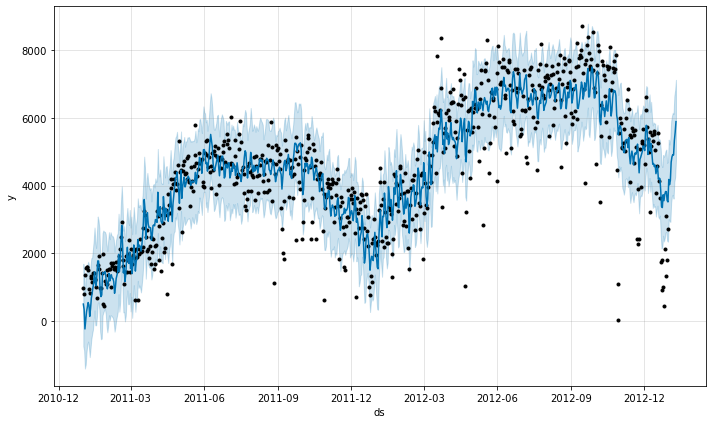

In [8]:
# plot forecast
m.plot(forecast)
pyplot.show()